<div style="text-align: center;">
    <h2> <b>Identifikasi Kualitas Daging Berbasis Citra untuk Industri Pangan</b>
    <h2> <b>(Kelompok 23)</b></div>
</div>


## **Pendahuluan**

### **Latar Belakang Topik**

Industri pangan memainkan peran penting dalam menjaga kualitas produk konsumsi masyarakat, dengan penjaminan kualitas daging menjadi aspek krusial yang mempengaruhi kesehatan dan kepuasan konsumen. Metode manual penilaian kualitas daging oleh pekerja berpengalaman bersifat subjektif, rentan kesalahan, dan memakan waktu. Namun, dengan kemajuan teknologi digital, khususnya dalam pengolahan citra, ada peluang besar untuk mengotomatisasi penilaian kualitas daging secara lebih konsisten, cepat, dan objektif. Analisis citra digital dapat mengidentifikasi ciri visual terkait kesegaran daging, seperti warna, tekstur, dan pola pembusukan, yang diharapkan meningkatkan akurasi dan efisiensi proses penilaian. Pendekatan ini juga memungkinkan penggunaan teknik preprocessing dalam pengolahan citra untuk meningkatkan efektivitas analisis dan klasifikasi kualitas daging.

## **Pembahasan**

### **Menyediakan Library Yang Akan Digunakan**

In [8]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as im
import os 
import pandas as pd
import cv2 as cv
from skimage.color import rgb2gray
import math
import random
import pandas as pd
from skimage.feature import graycomatrix, graycoprops
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


ModuleNotFoundError: No module named 'seaborn'

`import numpy as np` : Digunakan untuk komputasi numerik dengan array dan matriks, serta menyediakan fungsi matematika tingkat tinggi untuk operasi ini.

`import matplotlib.pyplot as plt` : Digunakan untuk membuat visualisasi data seperti grafik dan plot.

`import matplotlib.image as im`: Digunakan untuk membaca dan memanipulasi gambar.

`import os`:  Digunakan untuk berinteraksi dengan sistem operasi, misalnya mengelola file dan direktori.

`import pandas` : Digunakan untuk manipulasi dan analisis data yang efisien dengan struktur data DataFrame dan Series.

`import cv2`: Digunakan untuk pemrosesan gambar dan video, termasuk fungsi untuk pengolahan citra digital.

`from skimage.color import rgb2gray` : Fungsi dari scikit-image yang digunakan untuk mengkonversi gambar RGB menjadi gambar grayscale.

`import math` : Menyediakan fungsi matematika dasar seperti trigonometri, logaritma, dll.

`import random` : Digunakan untuk menghasilkan angka acak dan melakukan berbagai operasi terkait.

`from skimage.feature import graycomatrix, graycoprops` : Digunakan untuk menghitung matriks co-occurrence tingkat abu-abu (GLCM) yang digunakan untuk menganalisis tekstur dan digunakan untuk menghitung sifat-sifat tekstur dari GLCM, seperti kontras, homogenitas, dan korelasi.

`from sklearn.model_selection import train_test_split` : Fungsi dari scikit-learn untuk membagi dataset menjadi set pelatihan dan pengujian.

`import seaborn as sns` :  Digunakan untuk membuat visualisasi statistik yang informatif dan menarik.

`from sklearn.decomposition import PCA` : Digunakan untuk reduksi dimensi data dengan cara mengubah data ke dalam komponen utama yang lebih sedikit tetapi tetap mempertahankan variasi data sebanyak mungkin.

`from sklearn.preprocessing import StandardScaler` : Digunakan untuk standarisasi fitur dengan menghapus rata-rata dan menskalakan ke varians unit.

`from sklearn.metrics import confusion_matrix` : Digunakan untuk menghitung matriks kebingungan yang memberikan gambaran tentang kinerja model klasifikasi.

`from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score` : Fungsi accuracy_score digunakan untuk menghitung akurasi klasifikasi, sedangkan precision_score digunakan untuk menghitung presisi klasifikasi. Fungsi recall_score menghitung recall atau sensitivitas klasifikasi, dan f1_score digunakan untuk menghitung skor F1 yang merupakan rata-rata harmonis dari presisi dan recall. 

`from sklearn.neighbors import KNeighborsClassifier` : Algoritma k-Nearest Neighbors (k-NN) untuk klasifikasi data.

`from sklearn.ensemble import RandomForestClassifier`: Algoritma ensemble yang menggunakan banyak pohon keputusan untuk klasifikasi data.

`from sklearn.svm import SVC` Algoritma Support Vector Machine untuk klasifikasi data.

`from sklearn.discriminant_analysis import LinearDiscriminantAnalysis` : Algoritma untuk analisis diskriminan linear, digunakan untuk klasifikasi dan pengurangan dimensi.


### **Data Loading**

In [11]:
folder = [
    "dataset/busuk/",
    "dataset/segar/",
    "dataset/setengah segar/"
]
data = []
labels = []
fileName = []
for i in folder:
    label = i.split('/')[-2].lower().replace(" ", "_")
    dataset = os.listdir(i)
    for file in dataset:
        image_path = os.path.join(i, file)
        nama = os.path.splitext(file)[0]
        temp = cv.imread(image_path)
        if temp is None:
            print(f"Error: Tidak dapat memuat gambar di {image_path}")
            continue
        data.append(temp)
        labels.append(label)
        fileName.append(nama)

Kode tersebut membaca gambar dari tiga folder berbeda dalam direktori "dataset" yang masing-masing berisi gambar daging busuk, segar, dan setengah segar. Untuk setiap gambar, kode akan menambahkan gambar tersebut ke dalam daftar data, menambahkan label yang sesuai (busuk, segar, atau setengah segar) ke dalam daftar labels, dan menambahkan nama file gambar tanpa ekstensi ke dalam daftar fileName. Jika ada gambar yang tidak dapat dimuat, pesan error akan dicetak dan gambar tersebut diabaikan. Label diubah menjadi huruf kecil dan spasi diganti dengan garis bawah.

Selanjutnya menampilkannya dalam diagram batang, dengan menghitung jumlah gambar dalam setiap folder (busuk, segar, dan setengah segar) dan menyimpannya dalam dictionary count_data, di mana kunci adalah nama folder dan nilai adalah jumlah gambar dalam folder tersebut.

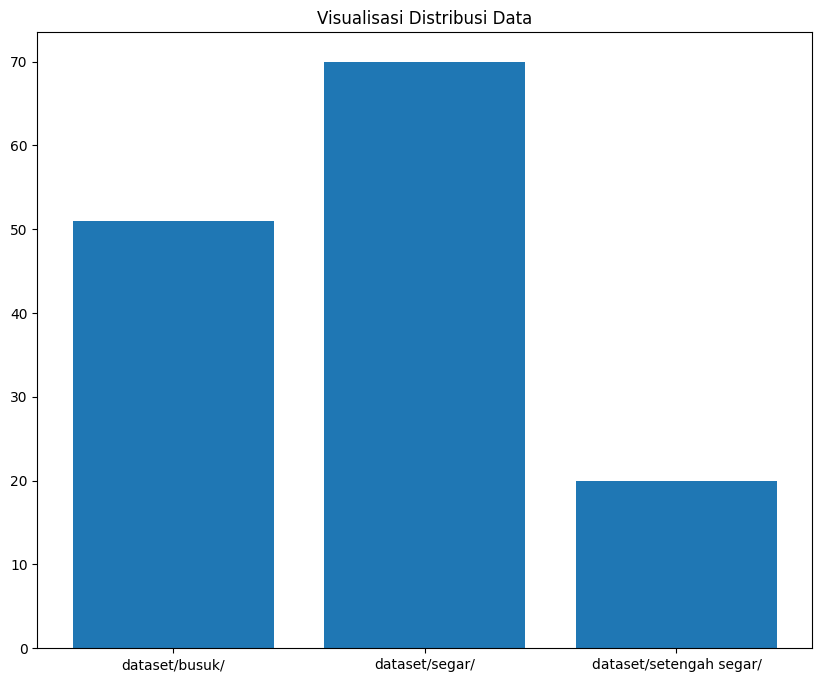

In [12]:
count_data = {}
for i in folder:
    count_data[i] = len(os.listdir(i))

plt.figure(figsize=(10, 8))
plt.bar(count_data.keys(), count_data.values())
plt.title('Visualisasi Distribusi Data')
plt.show()

Kemudian menampilkan sampel gambar dari setiap kategori label dalam dataset dalam fungsi `plot_samples`. Fungsi ini pertama-tama menemukan label unik dalam data, lalu membuat subplot dengan ukuran yang sesuai untuk menampilkan num_samples gambar dari setiap label. Untuk setiap label, fungsi memilih secara acak beberapa gambar, kemudian menampilkan gambar-gambar tersebut dalam subplot. Gambar grayscale ditampilkan dengan colormap 'gray', sementara gambar berwarna ditampilkan dengan konversi warna BGR ke RGB. Setiap gambar ditampilkan tanpa sumbu, dan subplot pertama dari setiap baris diberi judul sesuai dengan labelnya.

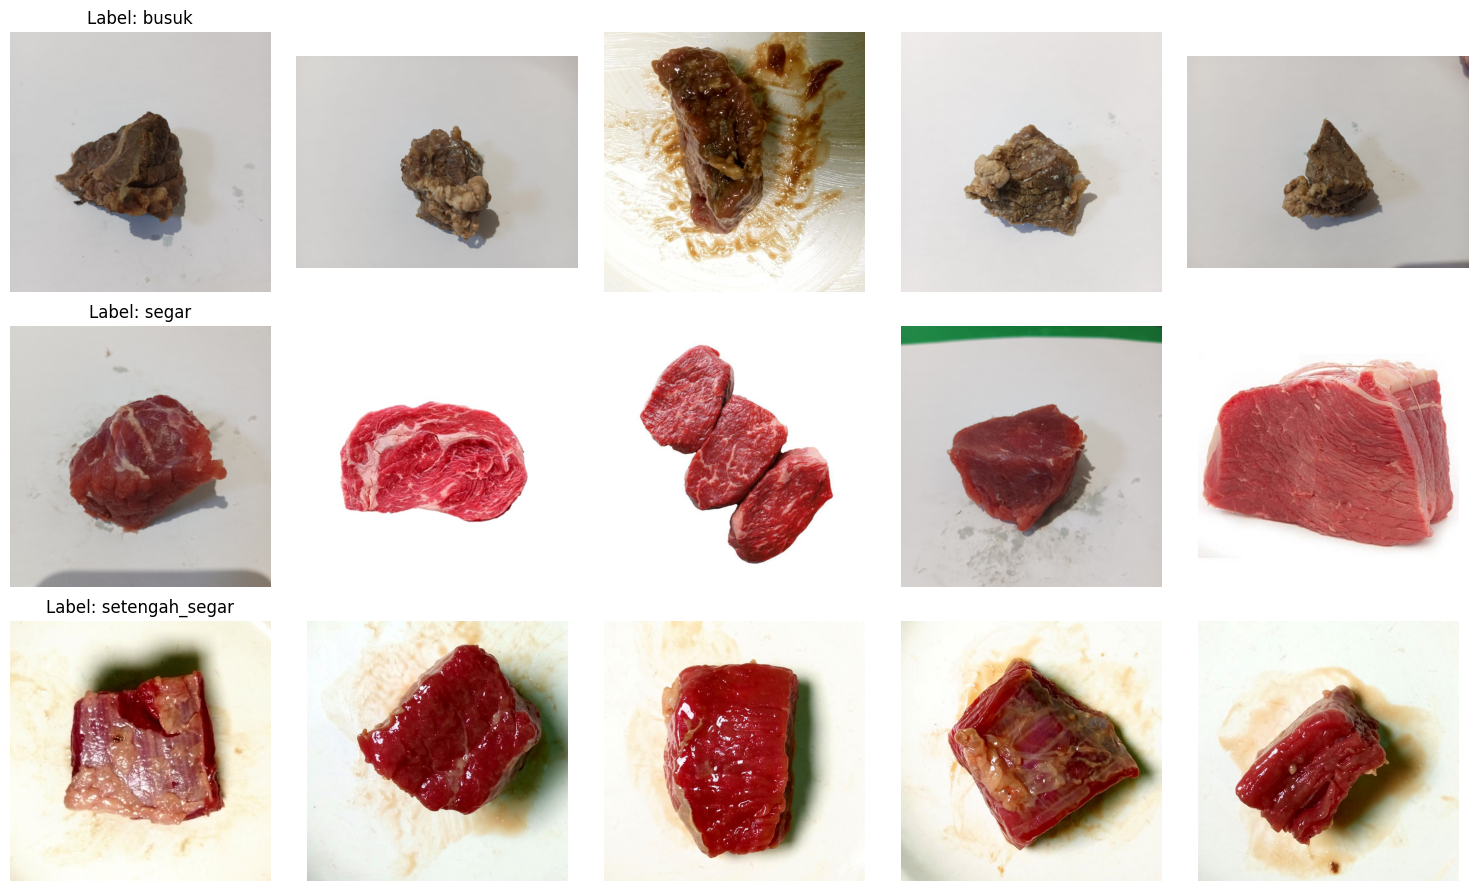

In [13]:
def plot_samples(data, label, num_samples=5):
    unique_labels = np.unique(label)
    fig, axes = plt.subplots(len(unique_labels), num_samples, figsize=(num_samples*3, len(unique_labels)*3))
    for i, j in enumerate(unique_labels):
        indices = [idx for idx, l in enumerate(label) if l == j]
        sample_indices = random.sample(indices, num_samples)
        for k, sample_idx in enumerate(sample_indices):
            if data[sample_idx].ndim == 2: 
                axes[i, k].imshow(data[sample_idx], cmap='gray')
            elif data[sample_idx].shape[2] == 3:
                image = data[sample_idx][:, :, ::-1]
                axes[i, k].imshow(image)
            axes[i, k].axis('off')
            if k == 0:
                axes[i, k].set_title(f'Label: {j}')

    plt.tight_layout()
    plt.show()

plot_samples(data, labels)

## **Data Preparation**

Data preparation adalah proses mengumpulkan, membersihkan, dan mengorganisir data mentah agar siap digunakan dalam analisis atau pemodelan lebih lanjut. 

In [14]:
data = []
labels = []
fileName = []
for i in folder:
    label = i.split('/')[-2].lower().replace(" ", "_")
    dataset = os.listdir(i)
    for file in dataset:
        image_path = os.path.join(i, file)
        nama = os.path.splitext(file)[0]
        temp = cv.imread(image_path)
        if temp is None:
            print(f"Error: Tidak dapat memuat gambar di {image_path}")
            continue
        grayimage = cv.cvtColor(temp, cv.COLOR_BGR2GRAY)
        data.append(grayimage)
        labels.append(label)
        fileName.append(nama)

Kode ini mirip dengan kode sebelumnya pada data loading, namun ada sedikit perbedaan penting seperti setelah memuat gambar, gambar tersebut dikonversi menjadi grayscale menggunakan cv.cvtColor dengan parameter cv.COLOR_BGR2GRAY. Ini berarti bahwa setiap gambar dalam dataset diubah menjadi gambar grayscale sebelum ditambahkan ke daftar data.

Selanjutnya menampilkan contoh gambar dari setiap kategori label dalam dataset yang telah dikonversi ke grayscale dengan fungsi `plot_samples`. Pertama, fungsi mengidentifikasi label unik dalam data, lalu membuat subplot dengan ukuran yang sesuai untuk menampilkan num_samples gambar dari setiap label. Untuk setiap label, fungsi memilih secara acak beberapa gambar, lalu menampilkan gambar-gambar tersebut dalam subplot

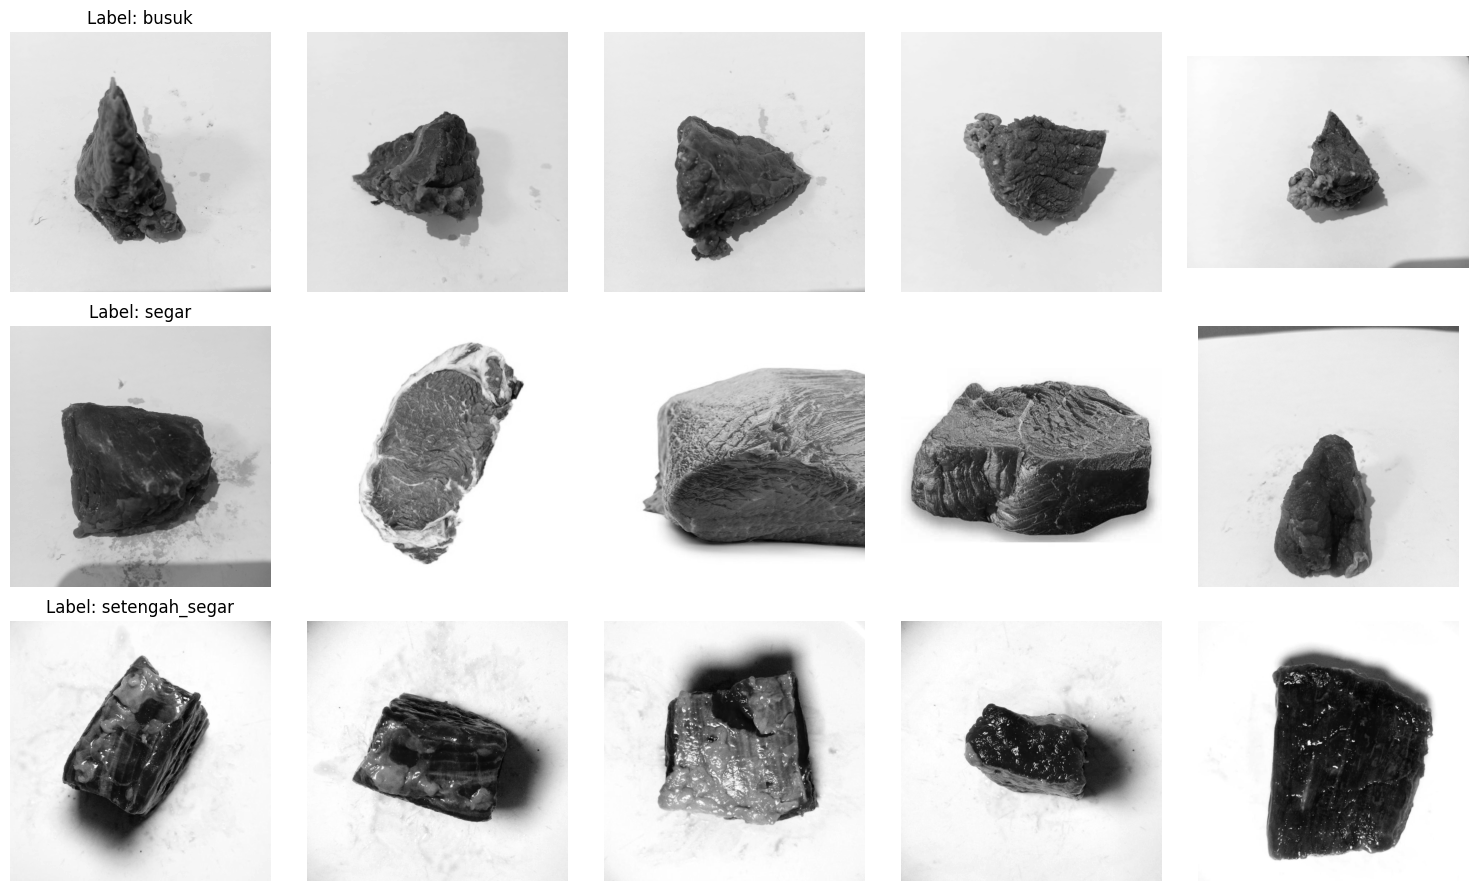

In [15]:
def plot_samples(data, label, num_samples=5):
    unique_labels = np.unique(label)
    fig, axes = plt.subplots(len(unique_labels), num_samples, figsize=(num_samples*3, len(unique_labels)*3))
    for i, j in enumerate(unique_labels):
        indices = [idx for idx, l in enumerate(label) if l == j]
        sample_indices = random.sample(indices, num_samples)
        for k, sample_idx in enumerate(sample_indices):
            if data[sample_idx].ndim == 2: 
                axes[i, k].imshow(data[sample_idx], cmap='gray')
            elif data[sample_idx].shape[2] == 3:
                image = data[sample_idx][:, :, ::-1]
                axes[i, k].imshow(image)
            axes[i, k].axis('off')
            if k == 0:
                axes[i, k].set_title(f'Label: {j}')

    plt.tight_layout()
    plt.show()

plot_samples(data, labels)

In [ ]:
def preprocess(image):
    resized_image = cv.resize(image,(500,500))
    equalized_image = cv.equalizeHist(resized_image).astype(np.uint8)
    hapus_noise = cv.GaussianBlur(equalized_image,(5, 5), 0)
    deteksi_tepi = cv.Canny(hapus_noise, 100, 200)
    kernel = np.ones((5, 5), np.uint8)
    closing = cv.morphologyEx(deteksi_tepi, cv.MORPH_CLOSE, kernel)
    
    return closing

Fungsi `preprocess` diatas melakukan serangkaian langkah pemrosesan gambar untuk mempersiapkan gambar grayscale sebelum analisis lebih lanjut. Pertama, gambar diubah ukurannya menjadi 500x500 piksel menggunakan cv.resize. Selanjutnya, histogram gambar disetarakan dengan cv.equalizeHist untuk meningkatkan kontras, kemudian gambar diburamkan menggunakan Gaussian Blur dengan kernel 5x5 untuk mengurangi noise. Setelah itu, tepi gambar dideteksi menggunakan algoritma Canny dengan batas bawah 100 dan batas atas 200. Terakhir, operasi morfologi closing diterapkan pada hasil deteksi tepi menggunakan kernel 5x5 untuk menutup celah kecil pada tepi dan menggabungkan area terpisah. 

In [ ]:
preprocessed_path = 'dataset/preprocess/'
kategori = ['busuk', 'segar', 'setengah_segar']

if not os.path.exists(preprocessed_path):
    os.makedirs(preprocessed_path)

for i in kategori:
    kategori_path = os.path.join(preprocessed_path, i)
    if not os.path.exists(kategori_path):
        os.makedirs(kategori_path)

Kode ini bertujuan untuk menyiapkan struktur direktori yang diperlukan untuk menyimpan data yang telah diproses dalam proyek tertentu. Pertama, variabel preprocessed_path diinisialisasi dengan path 'dataset/preprocess/' yang menunjukkan lokasi penyimpanan data yang telah diproses. Selain itu, daftar kategori yang berisi tiga kategori, yaitu 'busuk', 'segar', dan 'setengah_segar', juga diinisialisasi. Kode kemudian memeriksa apakah direktori utama yang ditentukan oleh preprocessed_path sudah ada atau belum dengan menggunakan fungsi os.path.exists(). Jika direktori tersebut tidak ada, maka kode akan membuatnya menggunakan os.makedirs(). Selanjutnya, kode melakukan iterasi melalui setiap kategori dalam daftar kategori. Untuk setiap kategori, kode membangun path lengkap dengan menggabungkan preprocessed_path dan nama kategori menggunakan os.path.join(). Kemudian, kode memeriksa apakah direktori untuk kategori tersebut sudah ada. Jika tidak ada, direktori tersebut akan dibuat menggunakan os.makedirs(). Dengan cara ini, kode memastikan bahwa semua direktori yang diperlukan untuk menyimpan data yang telah diproses tersedia, sehingga data dapat diatur dengan baik berdasarkan kategori masing-masing.

In [ ]:
preprocess_data = []
preprocess_labels = []
preprocess_file_names = []

counter = {'busuk': 1, 'segar': 1, 'setengah_segar': 1}

for i, image in enumerate(data):
    label = labels[i]
    name = fileName[i]
    prepro_image = preprocess(image)
    
    if label not in counter:
        print(f"Label {label} tidak ditemukan dalam counter dictionary.")
        continue

    images = [prepro_image]
    for j, img in enumerate(images):
        label_folder = label.lower()
        save_name = f"{label_folder}_{counter[label_folder]}.jpg"
        save_path = os.path.join(preprocessed_path, label_folder, save_name)
        cv.imwrite(save_path, img)
        preprocess_data.append(img)
        preprocess_labels.append(label)
        preprocess_file_names.append(save_name)
        counter[label_folder] += 1


Kode ini memproses gambar dalam dataset, menyimpannya ke dalam struktur direktori yang terorganisir berdasarkan kategori, serta mencatat informasi terkait. Pertama, tiga daftar kosong (preprocess_data, preprocess_labels, preprocess_file_names) dan sebuah dictionary counter untuk melacak jumlah gambar per kategori diinisialisasi. Kode ini kemudian melakukan iterasi melalui setiap gambar dalam data, mengambil label dan nama file, serta memproses gambar menggunakan fungsi preprocess(image). Jika label tidak ditemukan dalam counter, kode mencetak pesan kesalahan dan melanjutkan. Gambar yang telah diproses disimpan dalam direktori yang sesuai dengan nama file yang dibentuk dari label dan nilai counter saat ini. Informasi gambar, label, dan nama file ditambahkan ke daftar yang sesuai, dan nilai counter diperbarui. Proses ini memastikan setiap gambar disimpan dan diorganisir dengan baik sesuai kategorinya.

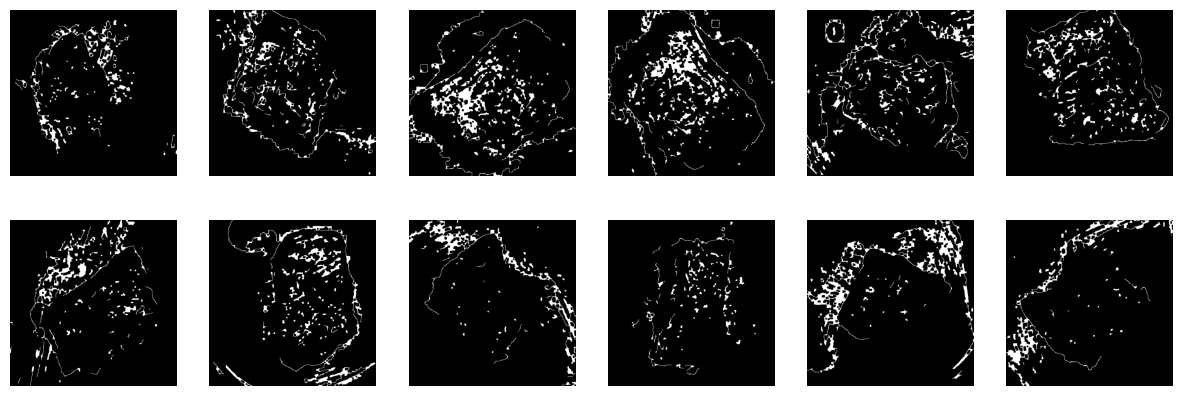

In [ ]:
plt.figure(figsize=(15, 5))
for i in range(12):
    plt.subplot(2, 6, i+1)
    plt.imshow(preprocess_data[i], cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
jenis = {
    'busuk' :0,
    'segar' :1,
    'setengah_segar' :2
}

Kode ini menginisialisasi sebuah dictionary jenis yang memetakan kategori gambar ke nilai numerik yang spesifik. Kategori 'busuk' dipetakan ke 0, 'segar' dipetakan ke 1, dan 'setengah_segar' dipetakan ke 2. Ini memungkinkan pengkodean kategori gambar ke dalam bentuk numerik yang lebih mudah untuk digunakan dalam pemrosesan data atau algoritma pembelajaran mesin.

In [ ]:
def extract_glcm_features(images, labels, distances=[5], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256, symmetric=True, normed=True):
    features = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation']
    angle_labels = ['0', '45', '90', '135']
    df_data = pd.DataFrame()
    for i, image in enumerate(images):
        image = image.astype(int)
        glcm = graycomatrix(image, distances, angles, levels, symmetric, normed)
        for feature in features:
            for angle, angle_label in zip(angles, angle_labels):
                feat_a = graycoprops(glcm, feature)[0, int(angle*4/np.pi)]
                df_data.loc[i, f'{feature}_{angle_label}'] = feat_a
        for angle, angle_label in zip(angles, angle_labels):
            asm = np.sum(glcm[:, :, 0, int(angle*4/np.pi)]**2)
            entropy = -np.sum(glcm[:, :, 0, int(angle*4/np.pi)]*np.log2(glcm[:, :, 0, int(angle*4/np.pi)] + np.finfo(float).eps))
            df_data.loc[i, f'asm_{angle_label}'] = asm
            df_data.loc[i, f'entropy_{angle_label}'] = entropy
        df_data.loc[i, 'label'] = jenis[labels[i]]
    return df_data

Fungsi extract_glcm_features mengekstrak fitur-fitur tekstur dari gambar menggunakan matriks ko-ocurrence level abu-abu (GLCM) dan mengembalikan hasilnya dalam bentuk DataFrame. Pertama, ia menginisialisasi daftar fitur yang akan diekstraksi dan label sudut yang sesuai. Kemudian, DataFrame kosong dibuat untuk menampung fitur-fitur ini. Fungsi ini melakukan iterasi melalui setiap gambar dalam daftar images, mengubah gambar menjadi tipe integer, dan menghitung GLCM menggunakan graycomatrix. Fitur-fitur seperti kontras, dissimilarity, homogeneity, energy, dan korelasi diekstraksi untuk setiap sudut dan disimpan dalam DataFrame. Selain itu, fungsi ini menghitung Angular Second Moment (ASM) dan entropi untuk setiap sudut dan menambahkannya ke DataFrame. Akhirnya, label numerik untuk setiap gambar ditambahkan dengan mengonversi label teks menggunakan dictionary jenis. DataFrame yang berisi semua fitur yang diekstraksi dan label kemudian dikembalikan oleh fungsi ini.

In [ ]:
folder_baru = [
    "dataset/preprocess/busuk/",
    "dataset/preprocess/segar/",
    "dataset/preprocess/setengah_segar/"
]
data = []
labels = []
fileName = []
for i in folder:
    label = i.split('/')[-2].lower().replace(" ", "_")
    dataset = os.listdir(i)
    for file in dataset:
        image_path = os.path.join(i, file)
        nama = os.path.splitext(file)[0]
        temp = cv.imread(image_path)
        if temp is None:
            print(f"Error: Tidak dapat memuat gambar di {image_path}")
            continue
        grayimage = cv.cvtColor(temp, cv.COLOR_BGR2GRAY)
        data.append(grayimage)
        labels.append(label)
        fileName.append(nama)

Kode ini menginisialisasi sebuah list folder_baru yang berisi path untuk setiap kategori gambar yang diproses sebelumnya ('busuk', 'segar', dan 'setengah_segar'). Selanjutnya, kode melakukan iterasi melalui setiap path dalam list folder, mengambil label dari nama folder (dikonversi ke huruf kecil dan mengganti spasi dengan garis bawah), dan mengumpulkan setiap file gambar dalam folder tersebut. Untuk setiap file gambar, path lengkapnya dibuat dengan os.path.join(), nama file tanpa ekstensi diambil dengan os.path.splitext(), dan gambar dimuat menggunakan cv.imread(). Jika gambar tidak dapat dimuat, pesan kesalahan dicetak dan iterasi dilanjutkan ke file berikutnya. Gambar yang berhasil dimuat dikonversi ke citra grayscale dengan cv.cvtColor() dan ditambahkan ke daftar data, sedangkan label dan nama file ditambahkan ke daftar labels dan fileName masing-masing.

In [ ]:
df_glcm = extract_glcm_features(data, labels=labels)

In [ ]:
df_glcm

,contrast_0,contrast_45,contrast_90,contrast_135,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,homogeneity_0,homogeneity_45,...,correlation_135,asm_0,entropy_0,asm_45,entropy_45,asm_90,entropy_90,asm_135,entropy_135,label
0,280.509868,299.639203,253.704662,311.036746,8.662059,9.008351,8.091659,9.200747,0.246292,0.223967,...,0.964685,0.000462,12.934500,0.000406,13.005976,0.000464,12.844918,0.000443,13.014965,0.0
1,445.626076,473.745114,411.986987,472.406507,9.654942,10.177193,9.330239,10.263869,0.437060,0.424963,...,0.952824,0.113902,9.817991,0.111844,9.904494,0.113652,9.808939,0.111647,9.916603,0.0
2,694.747084,789.948825,712.643256,700.638580,13.702776,14.951861,13.847735,13.818073,0.323298,0.310538,...,0.936735,0.054995,11.474744,0.052513,11.609896,0.053643,11.501551,0.052914,11.527343,0.0
3,711.484174,700.136626,695.223930,789.792976,13.825977,13.810879,13.702131,14.947216,0.320790,0.319308,...,0.928686,0.053721,11.497709,0.053029,11.524477,0.055102,11.472788,0.052632,11.607236,0.0
4,459.035925,514.987840,462.088013,513.951740,10.791678,11.701554,11.113258,11.820833,0.323285,0.313647,...,0.951649,0.041428,11.218604,0.039912,11.338060,0.041511,11.262799,0.039916,11.348689,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,368.957193,401.123006,302.421937,387.587792,8.951657,9.571923,7.807760,9.290852,0.251586,0.233158,...,0.968900,0.001473,12.042305,0.001339,12.123642,0.001560,11.887540,0.001346,12.100802,2.0
137,346.683926,397.940445,275.908976,277.078955,7.131424,7.713010,6.275783,6.349109,0.406745,0.388630,...,0.977449,0.006946,10.103872,0.006090,10.218408,0.007289,10.005477,0.006078,10.125327,2.0
138,182.524392,264.909764,303.358069,306.936581,5.987457,7.088695,7.271430,7.467144,0.289312,0.266283,...,0.976114,0.002599,10.674160,0.002410,10.818219,0.002612,10.774388,0.002463,10.834799,2.0
139,391.541795,406.363415,258.664007,371.844040,7.385501,7.599882,5.847022,7.508360,0.443627,0.421944,...,0.969199,0.015124,9.884938,0.013338,9.980196,0.015807,9.722600,0.013365,9.983144,2.0


In [ ]:
df_glcm.to_csv('glcm_features_small.csv', index=False)
df_glcm = pd.read_csv('glcm_features_small.csv')

Kode ini berfungsi untuk menyimpan DataFrame df_glcm ke dalam file CSV dengan nama 'glcm_features_small.csv' menggunakan metode to_csv() dari pandas. Opsi index=False digunakan untuk menghindari menyimpan indeks DataFrame ke dalam file CSV.

Kode dibawah menghitung matriks korelasi antar fitur dalam DataFrame df_glcm menggunakan df_glcm.corr(). Selanjutnya, hasil korelasi ini ditampilkan dalam bentuk heatmap menggunakan library seaborn (sns.heatmap()). Parameter annot=True digunakan untuk menampilkan nilai korelasi di dalam heatmap, cmap='coolwarm' digunakan untuk memilih skema warna heatmap, dan cbar=False digunakan untuk menyembunyikan color bar. Ukuran heatmap diatur dengan plt.figure(figsize=(15,15)) dan ukuran label pada sumbu x dan y diatur menggunakan plt.tick_params() untuk menyesuaikan tampilan. Akhirnya, heatmap ditampilkan dengan plt.show(), memvisualisasikan korelasi antar fitur GLCM dalam dataset Anda.

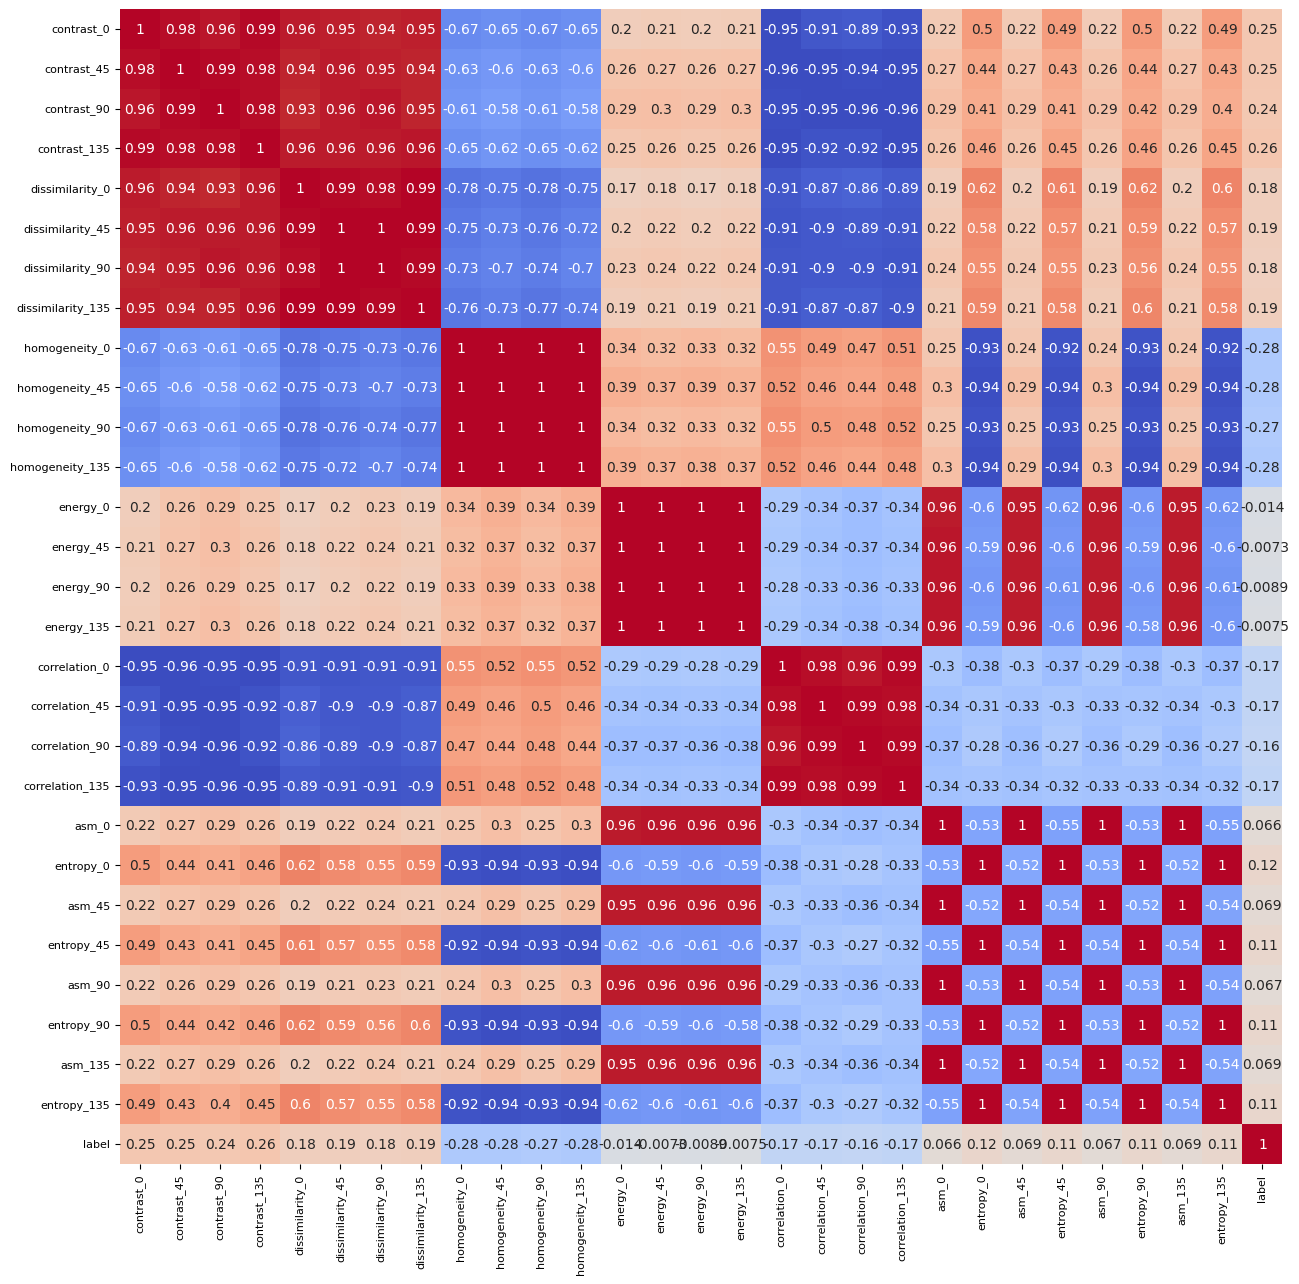

In [ ]:
corr_glcm = df_glcm.corr()  
plt.figure(figsize=(15,15))
sns.heatmap(corr_glcm, annot=True, cmap='coolwarm', cbar=False)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.tick_params(axis='both', which='minor', labelsize=8)
plt.show()

In [ ]:
x, y = df_glcm.drop('label', axis=1), df_glcm['label']
pca = PCA(n_components=25)
x_pca = pca.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((112, 25), (29, 25), (112,), (29,))

Dalam proses pra-pemrosesan data, langkah-langkah pertama dilakukan dengan memisahkan dataset menjadi dua bagian utama: x, yang berisi fitur-fitur dari DataFrame df_glcm kecuali kolom 'label', dan y, yang berisi kolom 'label' yang menentukan kategori atau target dari data. Selanjutnya, analisis komponen utama (PCA) diterapkan dengan mengatur n_components=25, yang menghasilkan transformasi data x ke dalam bentuk yang lebih ringkas dan lebih mudah diolah dengan x_pca. Setelah itu, dataset dibagi menggunakan fungsi train_test_split untuk memisahkan data pelatihan (x_train dan y_train) serta data uji (x_test dan y_test), dengan ukuran data uji ditetapkan sebesar 20% dari dataset asli untuk evaluasi model. Penggunaan random_state=42 memastikan reproduktibilitas pembagian data untuk konsistensi hasil analisis. Langkah-langkah ini penting dalam mempersiapkan data untuk analisis lebih lanjut dan pengembangan model pembelajaran mesin.

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


Kode tersebut menggunakan StandardScaler dari scikit-learn untuk penskalaan fitur pada x_train dan x_test. Proses ini memastikan bahwa data diubah skala dengan mean nol dan varians satu, menjaga konsistensi dalam pemrosesan data dan memperbaiki kinerja model pembelajaran mesin.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1, metric='cosine')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.6896551724137931


Kode tersebut menggunakan K-Nearest Neighbors (KNN) dengan satu tetangga terdekat (n_neighbors=1) dan menggunakan metrik jarak cosine untuk melakukan klasifikasi. Model KNN dilatih dengan x_train dan y_train, kemudian melakukan prediksi pada x_test. Akurasi dari prediksi dievaluasi menggunakan accuracy_score antara y_test dan y_pred, yang dicetak sebagai hasil akhir.

In [ ]:
svm = SVC(kernel='rbf', C=30, gamma='auto')
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.7931034482758621


SVM (Support Vector Machine) menggunakan kernel RBF dengan parameter C=30 untuk mengontrol margin dan gamma='auto' untuk menentukan koefisien kernel secara otomatis. Model dilatih dengan x_train dan y_train, kemudian digunakan untuk memprediksi x_test. Akurasi dari prediksi dievaluasi dengan accuracy_score dan dicetak sebagai hasil akhir.

In [ ]:
rfc = RandomForestClassifier(n_estimators=500, class_weight='balanced', n_jobs=-1, max_depth=50, min_samples_leaf=1, min_samples_split=2, bootstrap=False, criterion='gini')
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.8275862068965517


RFC (Random Forest Classifier) menggunakan 500 estimator dengan class_weight='balanced', memanfaatkan semua core CPU (n_jobs=-1), dengan max_depth=50, min_samples_leaf=1, min_samples_split=2, bootstrap=False, dan kriteria criterion='gini'. Model dilatih dengan x_train dan y_train, dan hasil prediksi dievaluasi dengan accuracy_score, yang kemudian dicetak sebagai hasil akhir.

In [ ]:
model_dict = {
    'KNN': knn,
    'SVM': svm,
    'RF': rfc
}
df_eval = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'], index=model_dict.keys())


In [ ]:
for model_name, model in model_dict.items():
    y_pred = model.predict(x_test)
    df_eval.loc[model_name, 'Accuracy'] = accuracy_score(y_test, y_pred)
    df_eval.loc[model_name, 'Precision'] = precision_score(y_test, y_pred, average='weighted')
    df_eval.loc[model_name, 'Recall'] = recall_score(y_test, y_pred, average='weighted')
    df_eval.loc[model_name, 'F1 Score'] = f1_score(y_test, y_pred, average='weighted')
    
df_eval

,Accuracy,Precision,Recall,F1 Score
KNN,0.689655,0.727273,0.689655,0.687028
SVM,0.793103,0.799808,0.793103,0.791655
RF,0.827586,0.840568,0.827586,0.821427


Kode tersebut melakukan evaluasi berbagai model yang terdapat dalam model_dict. Untuk setiap model, dilakukan prediksi terhadap data uji (x_test), dan hasil prediksi tersebut dievaluasi menggunakan beberapa metrik performa klasifikasi: accuracy_score untuk akurasi, precision_score dengan rata-rata weighted untuk presisi, recall_score dengan rata-rata weighted untuk recall, dan f1_score dengan rata-rata weighted untuk F1 score. Hasil evaluasi untuk setiap model disimpan dalam DataFrame df_eval, yang mencakup nilai akurasi, presisi, recall, dan F1 score untuk setiap model yang dievaluasi.

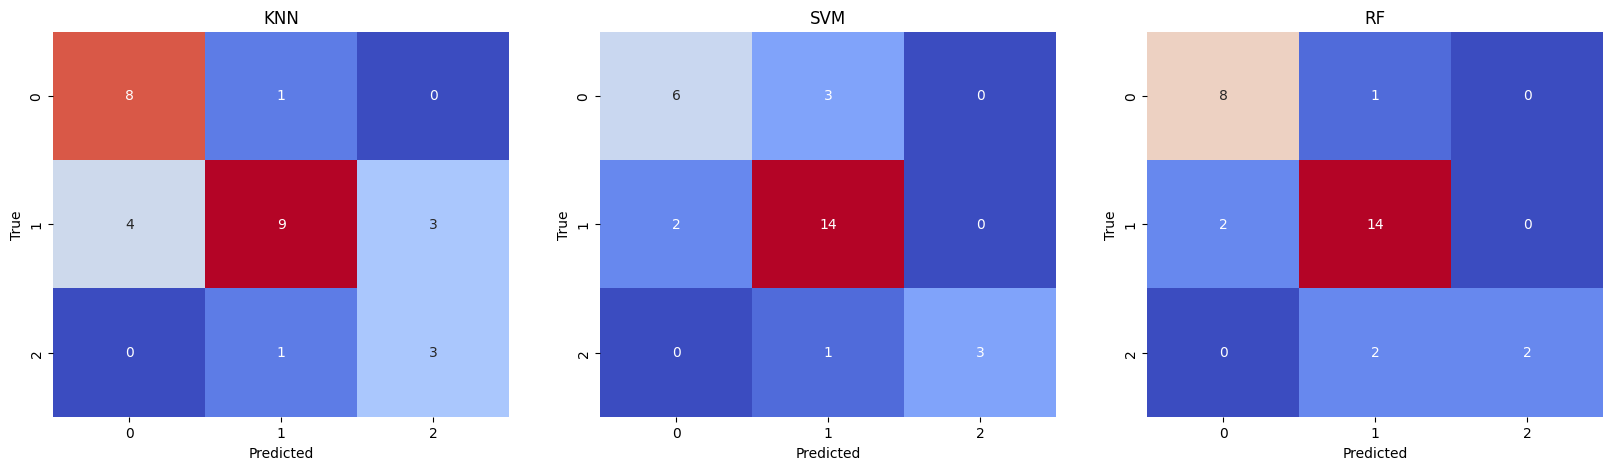

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
for i, model_name in enumerate(model_dict.keys()):
    y_pred = model_dict[model_name].predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='coolwarm', cbar=False, ax=ax[i])
    ax[i].set_xlabel('Predicted')
    ax[i].set_ylabel('True')
    ax[i].set_title(model_name)
plt.show()